In [1]:
from models.SklearnClassifier import SklearnClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import utils
import time
from Embeddings import Embeddings
from pprint import pprint

# Create the embeddings object
embeddings = Embeddings('../data/doc2vec.npy', '../data/bert.npy', '../data/authors.npy', '../data/authors_encoded.npy', '../pickles/author_encoder.pkl')

In [2]:
def run_naive_bayes(X, y, figure_title, scale_features=True):
    if scale_features:
        X = utils.scale_feature_matrix(X)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = SklearnClassifier(GaussianNB())
    # Find the best hyperparameters
    start = time.time()
    clf.train(X_train, y_train)
    print('Training time: ', time.time() - start)
    
    # Evaluate the model
    pprint(clf.evaluate(X_test, y_test))
    
    # Get the confusion matrix
    clf.get_confusion_matrix(X_test, y_test, figure_title)

In [3]:
# Load the feature matrix and labels
X = embeddings.get_doc2vec()
y = embeddings.get_labels()

Training time:  0.031862497329711914
{'Accuracy': 0.34518467380048323,
 'F1': 0.3477761196019517,
 'Precision': 0.4133180186165039,
 'Recall': 0.34518467380048323}


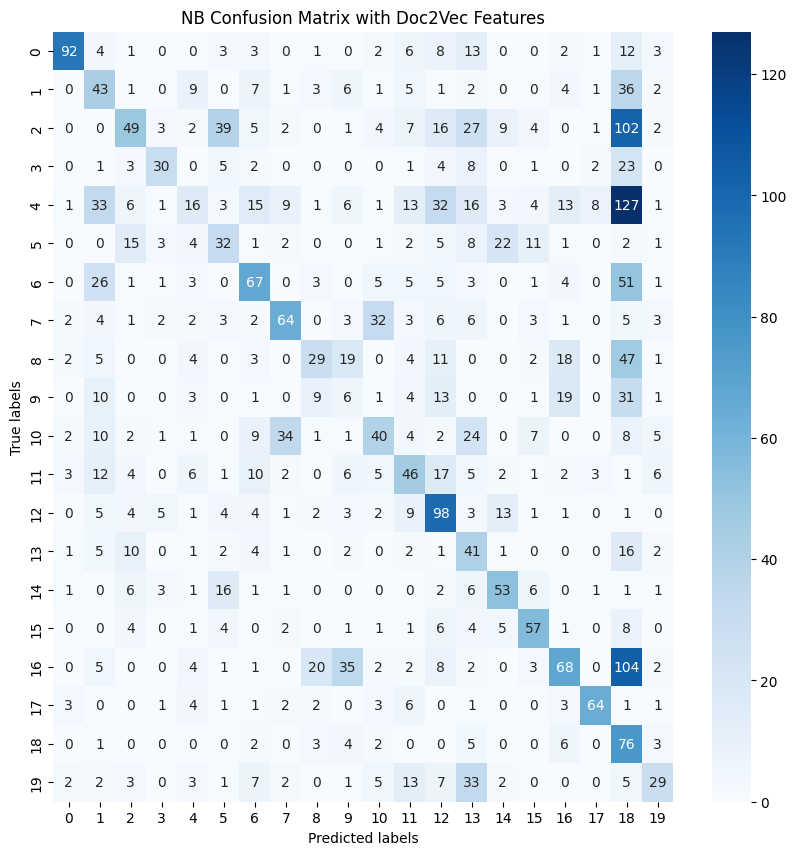

In [4]:
# Run the classifier with the Doc2Vec features
run_naive_bayes(X, y, 'NB Confusion Matrix with Doc2Vec Features')

In [5]:
# Load the feature matrix and labels for BERT
X = embeddings.get_bert()
y = embeddings.get_labels()

Training time:  0.02968311309814453
{'Accuracy': 0.609250949257853,
 'F1': 0.6142582924949214,
 'Precision': 0.6415788629122511,
 'Recall': 0.609250949257853}


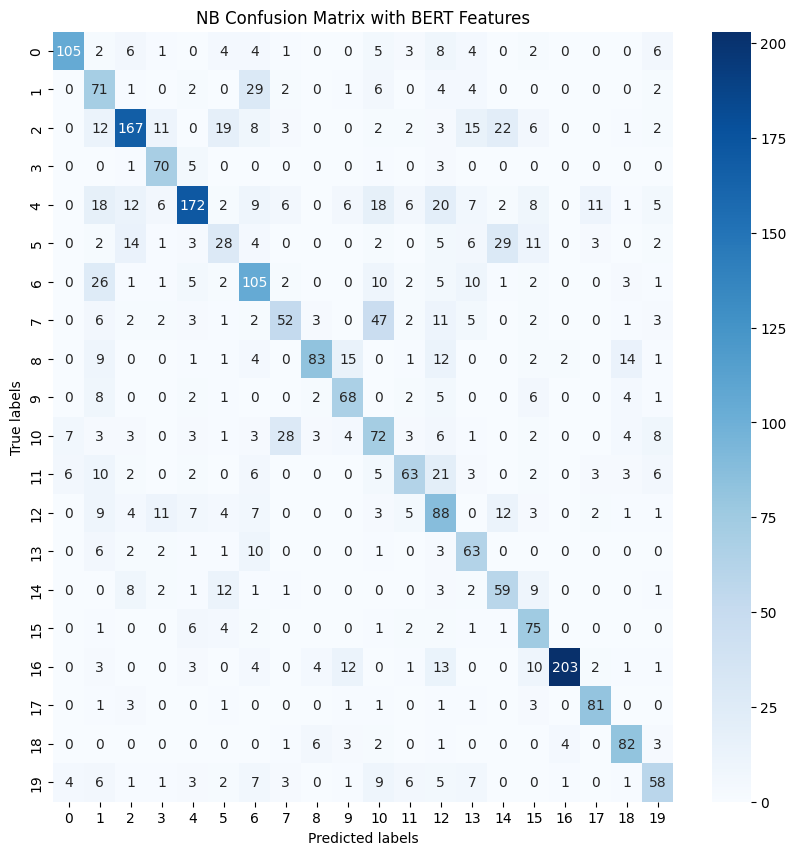

In [6]:
# Run the classifier with the BERT features
run_naive_bayes(X, y, 'NB Confusion Matrix with BERT Features')